# Final Observations:

#### Weather System Report
* **Temperature** Highest Fire counts occurred between 30-37 degree Celsius.
* **Rain** The greatest number of fires occurred when there was no rain or very little rain, or between 0.0 and 0.3.
* **Wind Speed** The most fires occurred when the wind speed was between 13 and 19 kilometres per hour.
* **Relative Humidity** greatest fire counts occurred when relative humidity was between 50 and 80 percent.

#### FWI System Components Report (Canadian Forest Fire Weather Index)

The range of possible scores for the `**Fine Fuel Moisture Code (FFMC)**` is between 28.6 and 92.5. The maximum number of fires occurs when the FFMC reaches its maximum value.

* *Duff Moisture Code (DMC)* index ranging from 1.1 to 65.9. There is no danger of a forest fire when the value range is between 1.1 and 10. The largest likelihood of a fire occurrence occurs between 10 and 30.

* *Drought Code (DC)* This index ranges from 7 to 220.4, with no possibility of occurrence between 0 and 25. After a threshold of 25, the likelihood of forest fires increases dramatically.

* Initial Spread Index (ISI) index spans from 0 to 18, with 0-3 indicating a reduced risk of forest fires and 3 and above indicating a greater risk of forest fires.

* *Buildup Index (BUI)* index which runs from 1.1 to 68, where 1.1 to 10 BUI has no possibility of forest fire and over 10 BUI has a greater possibility of forest fire.

* Fire Weather Index (FWI) Index which goes from 1 to 31.1, after 3 it has the greatest probability of forest fires occurring.

# 1. Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


# 2. Importing Dataset 

In [2]:
data=pd.read_csv("EDA.csv")
df=data.copy()
df.head(5)

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire


In [3]:
df.shape

(246, 14)

# 3. Handling the Missing Values

In [4]:
feature_nan=[feature for feature in df.columns if df[feature].isnull().sum()>=1]

for feature in feature_nan:
    print("The feature is {} and missing values in {}%".format(feature, np.round(df[feature].isnull().sum().mean(),4)))

The feature is month and missing values in 1.0%
The feature is year and missing values in 1.0%
The feature is Temperature and missing values in 1.0%
The feature is RH and missing values in 1.0%
The feature is Ws and missing values in 1.0%
The feature is Rain and missing values in 1.0%
The feature is FFMC and missing values in 1.0%
The feature is DMC and missing values in 1.0%
The feature is DC and missing values in 1.0%
The feature is ISI and missing values in 1.0%
The feature is BUI and missing values in 1.0%
The feature is FWI and missing values in 1.0%
The feature is Classes and missing values in 2.0%


In [5]:
df[df['Classes'].isnull() == True]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
122,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
167,14,07,2012,37,37,18,0.2,88.9,12.9,14.6 9,12.5,10.4,fire,NaN


In [6]:
df.iloc[123]

day                    day
month                month
year                  year
Temperature    Temperature
RH                      RH
Ws                      Ws
Rain                  Rain
FFMC                  FFMC
DMC                    DMC
DC                      DC
ISI                    ISI
BUI                    BUI
FWI                    FWI
Classes            Classes
Name: 123, dtype: object

In [7]:
#Drop 122 number of rows becasue all are nan 
df.drop([122,123], axis=0, inplace=True)

#shifted value of 'DC' column to right all columns
df.loc[167]['DC'] = 14.6
df.loc[167]['ISI'] = 9
df.loc[167]['BUI'] = 12.5
df.loc[167]['FWI'] = 10.4
df.loc[167]['Classes'] = 'fire'

In [8]:
df[df['Classes'].isnull() == True]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes


In [9]:
df.isnull().sum()

day            0
month          0
year           0
Temperature    0
RH             0
Ws             0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
dtype: int64

`Observation`: Right now there is no missing values

# 4. Converting Categorical to Numerical

In [10]:
df_numerical=df.drop(columns='Classes',axis=1)
df_numerical = df_numerical.apply(pd.to_numeric)
df_numerical['Classes']=df['Classes']
df=df_numerical
df.describe().T

,count,mean,std,min,25%,50%,75%,max
day,244.0,15.754098,8.825059,1.0,8.000,16.00,23.000,31.0
month,244.0,7.500000,1.112961,6.0,7.000,7.50,8.000,9.0
year,244.0,2012.000000,0.000000,2012.0,2012.000,2012.00,2012.000,2012.0
Temperature,244.0,32.172131,3.633843,22.0,30.000,32.00,35.000,42.0
RH,244.0,61.938525,14.884200,21.0,52.000,63.00,73.250,90.0
Ws,244.0,15.504098,2.810178,6.0,14.000,15.00,17.000,29.0
Rain,244.0,0.760656,1.999406,0.0,0.000,0.00,0.500,16.8
FFMC,244.0,77.887705,14.337571,28.6,72.075,83.50,88.300,96.0
DMC,244.0,14.673361,12.368039,0.7,5.800,11.30,20.750,65.9
DC,244.0,49.288115,47.619662,6.9,13.275,33.10,68.150,220.4


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 244 entries, 0 to 245
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          244 non-null    int64  
 1   month        244 non-null    int64  
 2   year         244 non-null    int64  
 3   Temperature  244 non-null    int64  
 4   RH           244 non-null    int64  
 5   Ws           244 non-null    int64  
 6   Rain         244 non-null    float64
 7   FFMC         244 non-null    float64
 8   DMC          244 non-null    float64
 9   DC           244 non-null    float64
 10  ISI          244 non-null    float64
 11  BUI          244 non-null    float64
 12  FWI          244 non-null    float64
 13  Classes      244 non-null    object 
dtypes: float64(7), int64(6), object(1)
memory usage: 36.7+ KB


In [12]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
day,244.0,15.754098,8.825059,1.0,8.000,16.00,23.000,31.0
month,244.0,7.500000,1.112961,6.0,7.000,7.50,8.000,9.0
year,244.0,2012.000000,0.000000,2012.0,2012.000,2012.00,2012.000,2012.0
Temperature,244.0,32.172131,3.633843,22.0,30.000,32.00,35.000,42.0
RH,244.0,61.938525,14.884200,21.0,52.000,63.00,73.250,90.0
Ws,244.0,15.504098,2.810178,6.0,14.000,15.00,17.000,29.0
Rain,244.0,0.760656,1.999406,0.0,0.000,0.00,0.500,16.8
FFMC,244.0,77.887705,14.337571,28.6,72.075,83.50,88.300,96.0
DMC,244.0,14.673361,12.368039,0.7,5.800,11.30,20.750,65.9
DC,244.0,49.288115,47.619662,6.9,13.275,33.10,68.150,220.4


`Observation`: All categorical data has been converted to numerical except the Classes.

# 5. Handling Imbanced dataset

In [13]:
df.count()

day            244
month          244
year           244
Temperature    244
RH             244
Ws             244
Rain           244
FFMC           244
DMC            244
DC             244
ISI            244
BUI            244
FWI            244
Classes        244
dtype: int64

In [14]:
df.Classes.value_counts()

fire        138
not fire    106
Name: Classes, dtype: int64

In [15]:
# Percentage for PieChart
percentage = df.Classes.value_counts(normalize=True)*100
percentage

fire        56.557377
not fire    43.442623
Name: Classes, dtype: float64

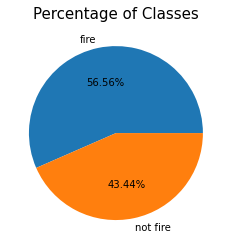

In [16]:
#plotting PieChart
classeslabels = ["fire", "not fire"]
plt.figure(figsize =(10, 4))
plt.pie(percentage,labels = classeslabels,autopct='%1.2f%%')  
plt.title ("Percentage of Classes", fontsize = 15)
plt.show() 

`Observation`: This is a balanced dataset

# 6. Removing Outliers

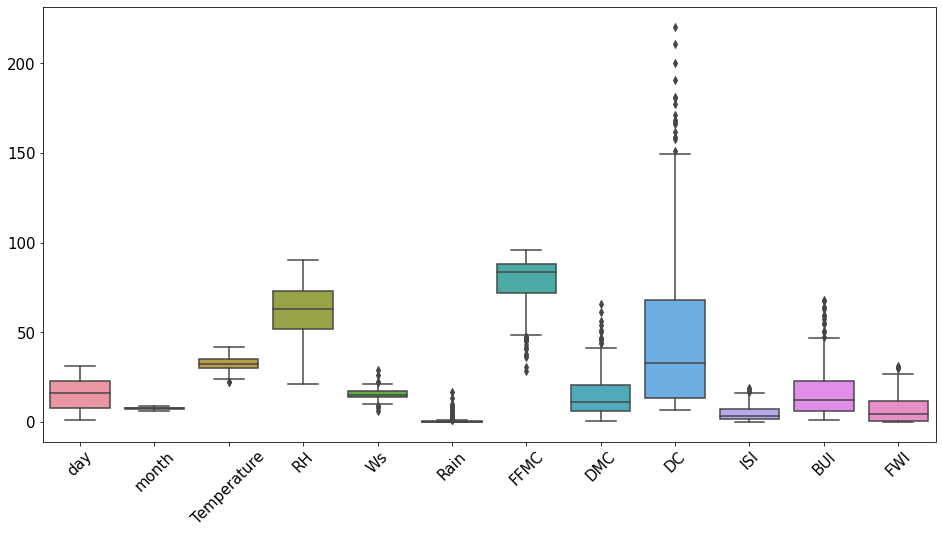

In [17]:
f, ax = plt.subplots(figsize=(16, 8))
sns.boxplot(data=df.drop(columns='year'))
plt.xticks(rotation=45,fontsize=15)
plt.yticks(fontsize=15)
plt.show()


In [18]:
def outliers(data,col):
    sorted_data = data[col].sort_values(ascending=True)
    quantile1,quantile3 = np.percentile(sorted_data,[25,75])
    iqr = quantile3-quantile1
    lower_bound = quantile1 -(1.5 * iqr) 
    upper_bound = quantile3 +(1.5 * iqr) 
    outliers=[i for i in sorted_data if i<lower_bound or i>upper_bound]
    return outliers

In [19]:
for feature in df.drop(columns=['Classes']).columns:
    if len(outliers(df, feature)) > 0:
        print(feature, len(outliers(df, feature)))
        print(outliers(df, feature), len(outliers(df, feature))/244*100)
        print('----------------------------------------')

Temperature 2
[22, 22] 0.819672131147541
----------------------------------------
Ws 8
[6, 8, 9, 9, 22, 22, 26, 29] 3.278688524590164
----------------------------------------
Rain 35
[1.3, 1.3, 1.4, 1.4, 1.7, 1.8, 1.8, 1.8, 1.9, 2.0, 2.0, 2.0, 2.2, 2.5, 2.9, 2.9, 3.1, 3.1, 3.8, 3.8, 4.0, 4.1, 4.4, 4.5, 4.6, 4.7, 5.8, 6.0, 6.5, 7.2, 8.3, 8.7, 10.1, 13.1, 16.8] 14.344262295081966
----------------------------------------
FFMC 16
[28.6, 30.5, 36.1, 37.3, 37.9, 40.9, 41.1, 42.6, 44.9, 45.0, 45.9, 46.0, 47.1, 47.4, 47.4, 47.4] 6.557377049180328
----------------------------------------
DMC 12
[43.9, 44.2, 45.6, 46.1, 46.6, 47.0, 50.2, 51.3, 54.2, 56.3, 61.3, 65.9] 4.918032786885246
----------------------------------------
DC 15
[151.3, 157.5, 159.1, 161.5, 166.0, 167.2, 168.2, 171.3, 177.3, 180.4, 181.3, 190.6, 200.2, 210.4, 220.4] 6.147540983606557
----------------------------------------
ISI 4
[16.6, 17.2, 18.5, 19.0] 1.639344262295082
----------------------------------------
BUI 12
[47.5, 

### 6.1 Flooring and clapping the values of the outliers

In [20]:
for feature in df.drop(columns=['Temperature', 'Classes']):
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    whisker_width = 1.5
    lower_whisker = Q1 -(whisker_width*IQR)
    upper_whisker = Q3 + (whisker_width*IQR)
    df[feature]=np.where(df[feature]>upper_whisker,upper_whisker,np.where(df[feature]<lower_whisker,lower_whisker,df[feature]))

In [21]:
for feature in df.drop(columns=['Classes']).columns:
    if len(outliers(df, feature)) > 0:
        print(feature, len(outliers(df, feature)))
        print(outliers(df, feature), len(outliers(df, feature))/244*100)
        print('------------------------')


Temperature 2
[22, 22] 0.819672131147541
------------------------


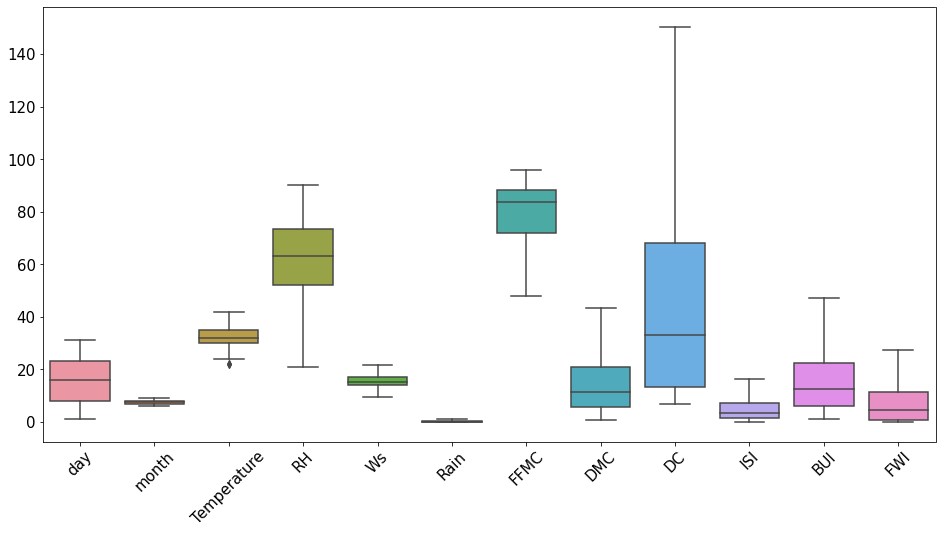

In [22]:
f, ax = plt.subplots(figsize=(16, 8))
sns.boxplot(data=df.drop(columns='year'))
plt.xticks(rotation=45,fontsize=15)
plt.yticks(fontsize=15)
plt.show()

In [23]:
df['Classes'].unique()

array(['not fire', 'fire'], dtype=object)

`Observation`: Outliers are removed

# 7. Data Distribution

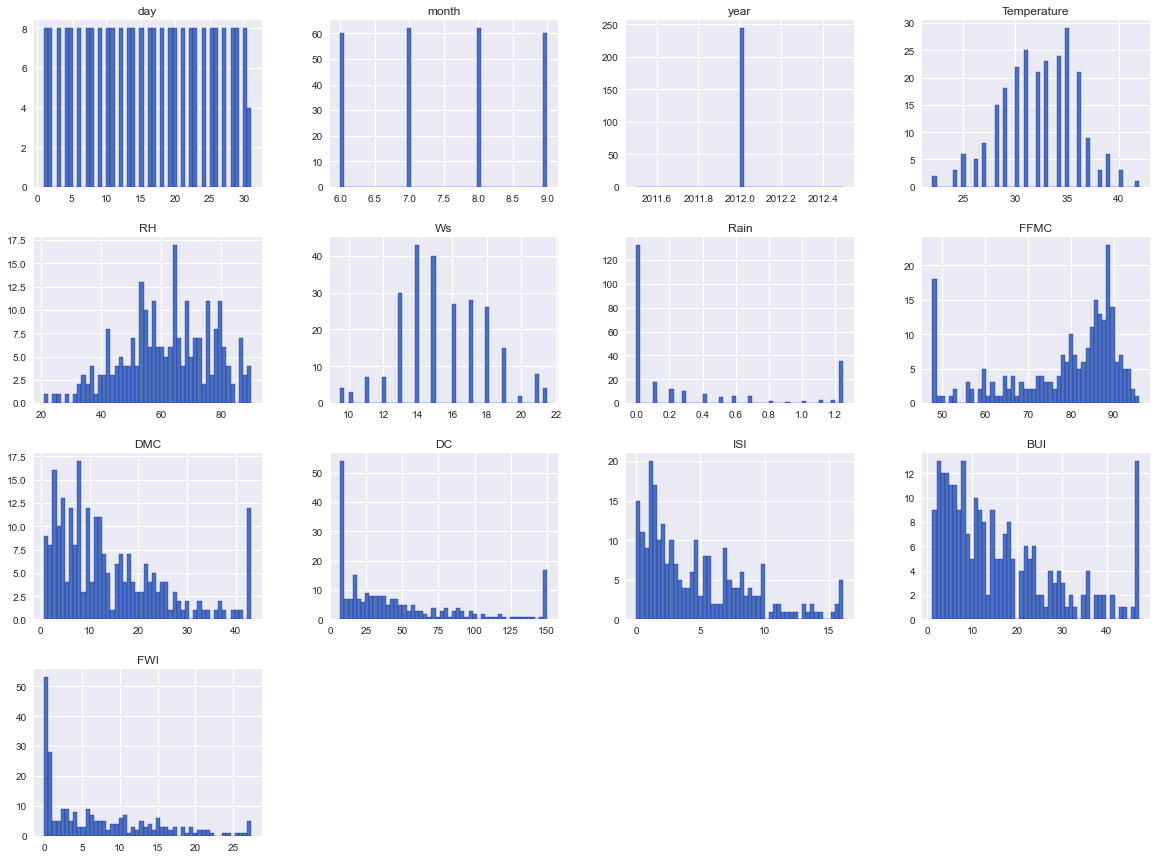

In [24]:
# Plot density for all features
plt.style.use('seaborn')
df.hist(bins=50, figsize=(20,15), ec = 'b')
plt.show()

# 8. Monthly Fire Investigation

In [25]:
df['month'].unique()

array([6., 7., 8., 9.])

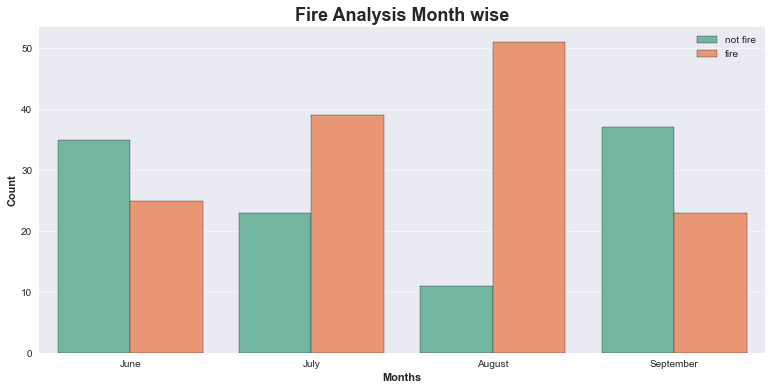

In [26]:
plt.subplots(figsize=(13,6))
sns.set_style('whitegrid')
sns.countplot(x='month',hue='Classes',data= df,ec = 'black', palette= 'Set2')
plt.title('Fire Analysis Month wise', fontsize=18, weight='bold')
plt.ylabel('Count', weight = 'bold')
plt.xlabel('Months', weight= 'bold')
plt.legend(loc='upper right')
plt.xticks(np.arange(4), ['June','July', 'August', 'September',])
plt.grid(alpha = 0.5,axis = 'y')
plt.show()

* It was found that the number of fires progressively rose from June to August. The majority of fire incidents occur in August, whereas the minority occur in September.


# 9. Encoding of Categorical feature: Classes

In [27]:
# Encoding Not fire as 0 and Fire as 1
df['Classes']= np.where(df['Classes']== 'not fire',0,1)

In [28]:
#df['Classes'] = df['Classes'].map({'not fire': 0, 'fire': 1})

In [29]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,1.0,6.0,2012.0,29,57.0,18.0,0.00,65.7000,3.4,7.6,1.3,3.4,0.5,0
1,2.0,6.0,2012.0,29,61.0,13.0,1.25,64.4000,4.1,7.6,1.0,3.9,0.4,0
2,3.0,6.0,2012.0,26,82.0,21.5,1.25,47.7375,2.5,7.1,0.3,2.7,0.1,0
3,4.0,6.0,2012.0,25,89.0,13.0,1.25,47.7375,1.3,6.9,0.0,1.7,0.0,0
4,5.0,6.0,2012.0,27,77.0,16.0,0.00,64.8000,3.0,14.2,1.2,3.9,0.5,0


In [30]:
#Droping day, moth, year features 
df1 = df.drop(['day','month','year'], axis=1)

In [31]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
Temperature,244.0,32.172131,3.633843,22.0000,30.000,32.00,35.000,42.0000
RH,244.0,61.938525,14.884200,21.0000,52.000,63.00,73.250,90.0000
Ws,244.0,15.475410,2.565081,9.5000,14.000,15.00,17.000,21.5000
Rain,244.0,0.310861,0.464097,0.0000,0.000,0.00,0.500,1.2500
FFMC,244.0,78.288115,13.283493,47.7375,72.075,83.50,88.300,96.0000
DMC,244.0,14.286066,11.194393,0.7000,5.800,11.30,20.750,43.1750
DC,244.0,47.625154,43.109643,6.9000,13.275,33.10,68.150,150.4625
ISI,244.0,4.732377,4.070694,0.0000,1.400,3.50,7.300,16.1500
BUI,244.0,16.146107,12.698510,1.1000,6.000,12.45,22.525,47.3125
FWI,244.0,6.999795,7.280715,0.0000,0.700,4.45,11.375,27.3875


In [32]:
def barchart(feature,xlabel):
    plt.figure(figsize=[14,8])
    by_feature =  df1.groupby([feature], as_index=False)['Classes'].sum()
    ax = sns.barplot(x=feature, y="Classes", data=by_feature[[feature,'Classes']], estimator=sum)
    ax.set(xlabel=xlabel, ylabel='Fire Count')

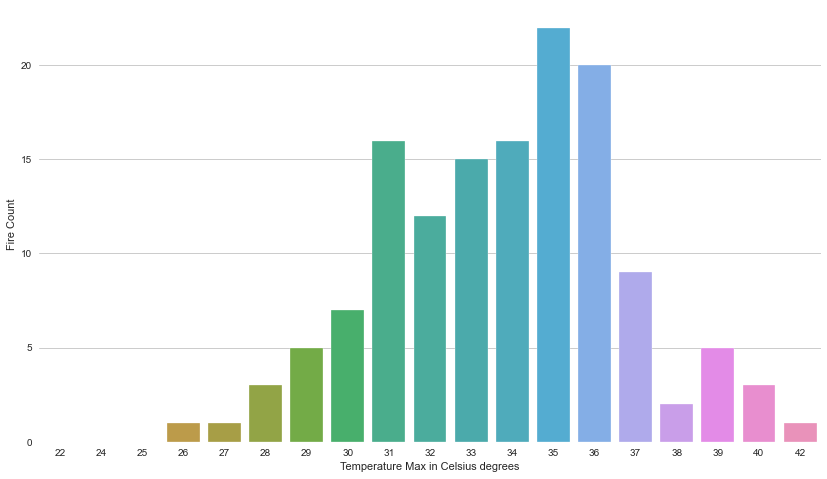

In [33]:
barchart('Temperature','Temperature Max in Celsius degrees')

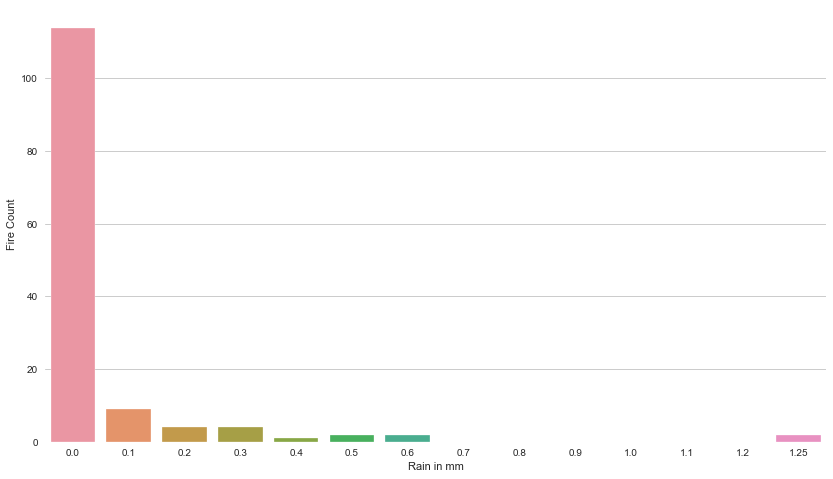

In [34]:
barchart('Rain', 'Rain in mm')

# 10. Indicator for the fineness of the fuel moisture (FFMC)

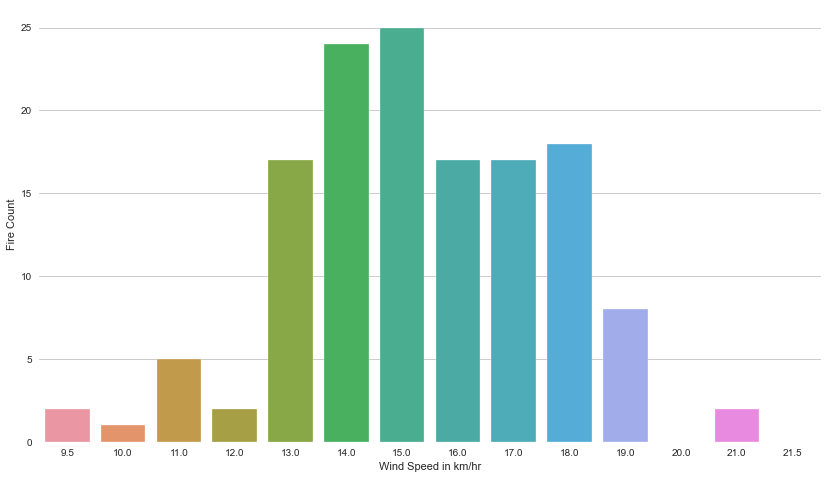

In [35]:
barchart('Ws', 'Wind Speed in km/hr')

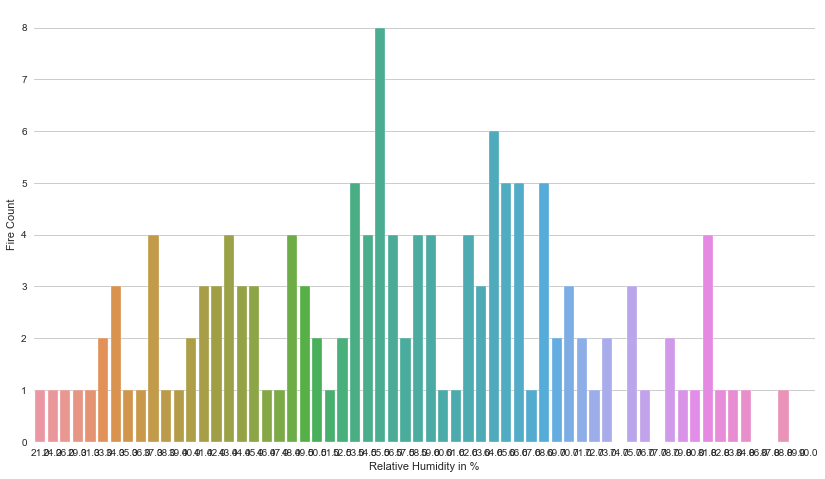

In [36]:
barchart('RH','Relative Humidity in %')

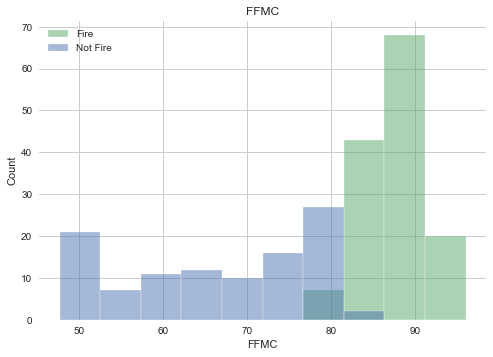

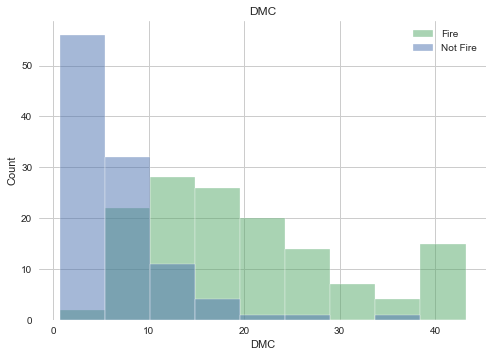

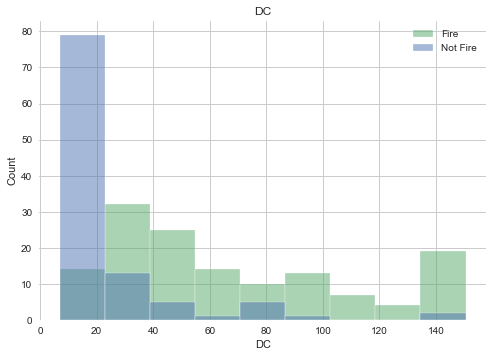

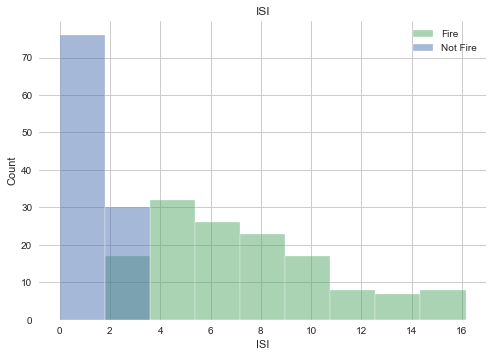

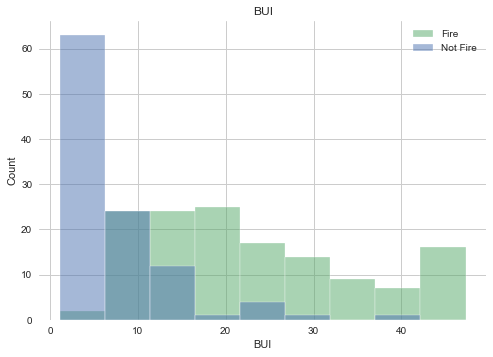

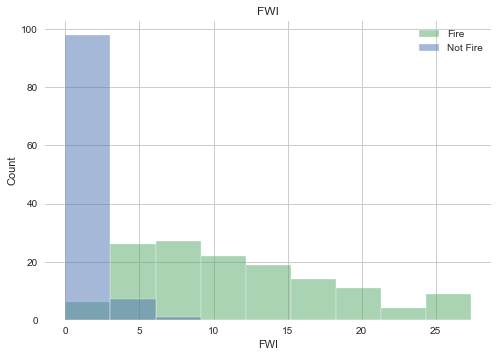

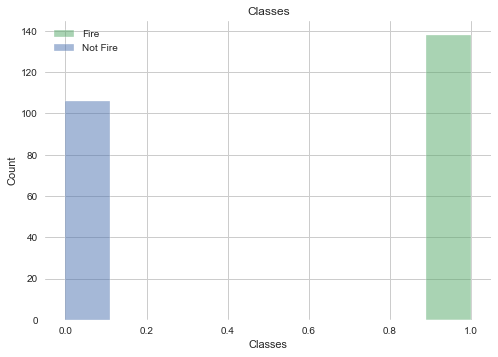

In [37]:
dftemp = dftemp = df1.drop(['Temperature','Rain','Ws','RH'], axis=1)
for feature in dftemp:
    sns.histplot(data = dftemp,x=feature, hue = 'Classes')
    plt.legend(labels=['Fire','Not Fire'])
    plt.title(feature)
    plt.show()

**Canadian Forest Fire Weather Index (FWI) System**:
This column can be considered for Regression problem

# 11. Scaling down using Standardization

In [38]:
df.head(5)

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,1.0,6.0,2012.0,29,57.0,18.0,0.00,65.7000,3.4,7.6,1.3,3.4,0.5,0
1,2.0,6.0,2012.0,29,61.0,13.0,1.25,64.4000,4.1,7.6,1.0,3.9,0.4,0
2,3.0,6.0,2012.0,26,82.0,21.5,1.25,47.7375,2.5,7.1,0.3,2.7,0.1,0
3,4.0,6.0,2012.0,25,89.0,13.0,1.25,47.7375,1.3,6.9,0.0,1.7,0.0,0
4,5.0,6.0,2012.0,27,77.0,16.0,0.00,64.8000,3.0,14.2,1.2,3.9,0.5,0


In this dataset, day, month, and year are not connected to classes for predicting. I will now delete that before scaling it.

In [39]:
df_scale_drop=df.drop(columns=['day','month','year','Classes'],axis=1)

In [40]:
df_scale_drop.describe()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI
count,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000
mean,32.172131,61.938525,15.475410,0.310861,78.288115,14.286066,47.625154,4.732377,16.146107,6.999795
std,3.633843,14.884200,2.565081,0.464097,13.283493,11.194393,43.109643,4.070694,12.698510,7.280715
min,22.000000,21.000000,9.500000,0.000000,47.737500,0.700000,6.900000,0.000000,1.100000,0.000000
25%,30.000000,52.000000,14.000000,0.000000,72.075000,5.800000,13.275000,1.400000,6.000000,0.700000
50%,32.000000,63.000000,15.000000,0.000000,83.500000,11.300000,33.100000,3.500000,12.450000,4.450000
75%,35.000000,73.250000,17.000000,0.500000,88.300000,20.750000,68.150000,7.300000,22.525000,11.375000
max,42.000000,90.000000,21.500000,1.250000,96.000000,43.175000,150.462500,16.150000,47.312500,27.387500


In [41]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
data_scaled = scaler.fit_transform(df_scale_drop)
data_scaled

array([[-0.87473544, -0.33247844,  0.98623771, ..., -0.84492522,
        -1.00581142, -0.89457636],
       [-0.87473544, -0.0631847 , -0.96702529, ..., -0.91877421,
        -0.96635578, -0.90833951],
       [-1.70200461,  1.35060746,  2.35352181, ..., -1.09108851,
        -1.0610493 , -0.94962895],
       ...,
       [-1.42624822,  1.68722464,  2.35352181, ..., -1.06647218,
        -1.00581142, -0.9358658 ],
       [-2.25351739, -0.53444875,  0.98623771, ..., -0.7464599 ,
        -0.87166226, -0.86705007],
       [-2.25351739,  0.13878561, -0.18572009, ..., -0.86954155,
        -0.89533564, -0.89457636]])

In [42]:
df_scaled = pd.DataFrame(data_scaled)
df_scaled

,0,1,2,3,4,5,6,7,8,9
0,-0.874735,-0.332478,0.986238,-0.671196,-0.949599,-0.974456,-0.930359,-0.844925,-1.005811,-0.894576
1,-0.874735,-0.063185,-0.967025,2.027745,-1.047666,-0.911796,-0.930359,-0.918774,-0.966356,-0.908340
2,-1.702005,1.350607,2.353522,2.027745,-2.304621,-1.055018,-0.941981,-1.091089,-1.061049,-0.949629
3,-1.977761,1.821872,-0.967025,2.027745,-2.304621,-1.162435,-0.946630,-1.164937,-1.139961,-0.963392
4,-1.426248,1.013990,0.204933,-0.671196,-1.017491,-1.010261,-0.776946,-0.869542,-0.966356,-0.894576
...,...,...,...,...,...,...,...,...,...,...
239,-0.598979,0.206109,-0.576373,-0.671196,0.536493,0.153421,-0.072642,-0.057203,0.059491,-0.068788
240,-1.150492,1.687225,-0.185720,2.027745,-2.304621,-0.696962,-0.921061,-1.140321,-0.784860,-0.963392
241,-1.426248,1.687225,2.353522,0.408381,-2.304621,-0.965504,-0.923385,-1.066472,-1.005811,-0.935866
242,-2.253517,-0.534449,0.986238,-0.455280,0.106507,-0.893893,-0.753702,-0.746460,-0.871662,-0.867050


In [43]:
column_name=['Temperature','RH','Ws','Rain','FFMC','DMC','DC','ISI','BUI','FWI']

In [44]:
df_scaled.rename(columns = {0:'Temperature', 1:'RH',2:'Ws',3:'Rain',4:'FFMC',5:'DMC',6:'DC',7:'ISI',8:'BUI',9:'FWI'}, inplace = True)
df_scaled

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI
0,-0.874735,-0.332478,0.986238,-0.671196,-0.949599,-0.974456,-0.930359,-0.844925,-1.005811,-0.894576
1,-0.874735,-0.063185,-0.967025,2.027745,-1.047666,-0.911796,-0.930359,-0.918774,-0.966356,-0.908340
2,-1.702005,1.350607,2.353522,2.027745,-2.304621,-1.055018,-0.941981,-1.091089,-1.061049,-0.949629
3,-1.977761,1.821872,-0.967025,2.027745,-2.304621,-1.162435,-0.946630,-1.164937,-1.139961,-0.963392
4,-1.426248,1.013990,0.204933,-0.671196,-1.017491,-1.010261,-0.776946,-0.869542,-0.966356,-0.894576
...,...,...,...,...,...,...,...,...,...,...
239,-0.598979,0.206109,-0.576373,-0.671196,0.536493,0.153421,-0.072642,-0.057203,0.059491,-0.068788
240,-1.150492,1.687225,-0.185720,2.027745,-2.304621,-0.696962,-0.921061,-1.140321,-0.784860,-0.963392
241,-1.426248,1.687225,2.353522,0.408381,-2.304621,-0.965504,-0.923385,-1.066472,-1.005811,-0.935866
242,-2.253517,-0.534449,0.986238,-0.455280,0.106507,-0.893893,-0.753702,-0.746460,-0.871662,-0.867050


In [45]:
df['Classes'].count()

244

In [46]:
df3=df[['day','month','year','Classes']]
#df = df_scaled[['Temperature','RH','Ws','Rain','FFMC','DMC','DC','ISI','BUI','FWI']] + df[['day','month','year','Classes']]

In [47]:
df3['Classes'].isnull().sum()

0

In [48]:
df3 = df3.reset_index(level=0)

In [49]:
df_scaled = df_scaled.reset_index(level=0)

In [50]:
concatenated = pd.concat([df_scaled, df3], axis="columns",ignore_index=False)

In [51]:
concatenated.describe().T

,count,mean,std,min,25%,50%,75%,max
index,244.0,1.215000e+02,70.580923,0.000000,60.750000,121.500000,182.250000,243.000000
Temperature,244.0,8.080968e-16,1.002056,-2.805030,-0.598979,-0.047466,0.779803,2.710098
RH,244.0,-2.317136e-16,1.002056,-2.756122,-0.669096,0.071462,0.761527,1.889195
Ws,244.0,1.340003e-16,1.002056,-2.334309,-0.576373,-0.185720,0.595585,2.353522
Rain,244.0,1.706285e-17,1.002056,-0.671196,-0.671196,-0.671196,0.408381,2.027745
FFMC,244.0,1.788187e-16,1.002056,-2.304621,-0.468693,0.393165,0.755258,1.336116
DMC,244.0,4.277089e-17,1.002056,-1.216144,-0.759622,-0.267295,0.578613,2.585966
DC,244.0,1.865539e-17,1.002056,-0.946630,-0.798447,-0.337628,0.477087,2.390387
ISI,244.0,1.246726e-16,1.002056,-1.164937,-0.820309,-0.303366,0.632055,2.810600
BUI,244.0,-8.736181e-17,1.002056,-1.187307,-0.800642,-0.291664,0.503367,2.459380


In [52]:
concatenated[concatenated["Classes"].isnull()==True]

,index,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,index,day,month,year,Classes


In [53]:
concatenated.head()

,index,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,index,day,month,year,Classes
0,0,-0.874735,-0.332478,0.986238,-0.671196,-0.949599,-0.974456,-0.930359,-0.844925,-1.005811,-0.894576,0,1.0,6.0,2012.0,0
1,1,-0.874735,-0.063185,-0.967025,2.027745,-1.047666,-0.911796,-0.930359,-0.918774,-0.966356,-0.908340,1,2.0,6.0,2012.0,0
2,2,-1.702005,1.350607,2.353522,2.027745,-2.304621,-1.055018,-0.941981,-1.091089,-1.061049,-0.949629,2,3.0,6.0,2012.0,0
3,3,-1.977761,1.821872,-0.967025,2.027745,-2.304621,-1.162435,-0.946630,-1.164937,-1.139961,-0.963392,3,4.0,6.0,2012.0,0
4,4,-1.426248,1.013990,0.204933,-0.671196,-1.017491,-1.010261,-0.776946,-0.869542,-0.966356,-0.894576,4,5.0,6.0,2012.0,0


In [54]:
df=concatenated

In [55]:
df.head()

,index,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,index,day,month,year,Classes
0,0,-0.874735,-0.332478,0.986238,-0.671196,-0.949599,-0.974456,-0.930359,-0.844925,-1.005811,-0.894576,0,1.0,6.0,2012.0,0
1,1,-0.874735,-0.063185,-0.967025,2.027745,-1.047666,-0.911796,-0.930359,-0.918774,-0.966356,-0.908340,1,2.0,6.0,2012.0,0
2,2,-1.702005,1.350607,2.353522,2.027745,-2.304621,-1.055018,-0.941981,-1.091089,-1.061049,-0.949629,2,3.0,6.0,2012.0,0
3,3,-1.977761,1.821872,-0.967025,2.027745,-2.304621,-1.162435,-0.946630,-1.164937,-1.139961,-0.963392,3,4.0,6.0,2012.0,0
4,4,-1.426248,1.013990,0.204933,-0.671196,-1.017491,-1.010261,-0.776946,-0.869542,-0.966356,-0.894576,4,5.0,6.0,2012.0,0


In [56]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
index,244.0,1.215000e+02,70.580923,0.000000,60.750000,121.500000,182.250000,243.000000
Temperature,244.0,8.080968e-16,1.002056,-2.805030,-0.598979,-0.047466,0.779803,2.710098
RH,244.0,-2.317136e-16,1.002056,-2.756122,-0.669096,0.071462,0.761527,1.889195
Ws,244.0,1.340003e-16,1.002056,-2.334309,-0.576373,-0.185720,0.595585,2.353522
Rain,244.0,1.706285e-17,1.002056,-0.671196,-0.671196,-0.671196,0.408381,2.027745
FFMC,244.0,1.788187e-16,1.002056,-2.304621,-0.468693,0.393165,0.755258,1.336116
DMC,244.0,4.277089e-17,1.002056,-1.216144,-0.759622,-0.267295,0.578613,2.585966
DC,244.0,1.865539e-17,1.002056,-0.946630,-0.798447,-0.337628,0.477087,2.390387
ISI,244.0,1.246726e-16,1.002056,-1.164937,-0.820309,-0.303366,0.632055,2.810600
BUI,244.0,-8.736181e-17,1.002056,-1.187307,-0.800642,-0.291664,0.503367,2.459380


In [57]:
df.to_csv("Feature_Engineering.csv",index=False)